In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize, Imputer, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error

In [2]:
# import dataset
from sklearn.datasets import load_boston

In [3]:
# load boston dataset
boston = load_boston()

In [4]:
# print description of bostondata
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# check data shape
boston.data.shape

(506, 13)

In [6]:
# create a pandas dataframe
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# assign features names to columns
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
CRIM = df.CRIM.unique().tolist()
ZN = df.ZN.unique().tolist()
INDUS = df.INDUS.unique().tolist()
CHAS = df.CHAS.unique().tolist()
NOX = df.NOX.unique().tolist()
RM = df.RM.unique().tolist()
AGE = df.AGE.unique().tolist()
DIS = df.DIS.unique().tolist()
RAD = df.RAD.unique().tolist()
TAX = df.TAX.unique().tolist()
PTRATIO = df.PTRATIO.unique().tolist()
B = df.B.unique().tolist()
LSTAT = df.LSTAT.unique().tolist()

In [9]:
# add price values as a column to the dataframe
df['PRICE'] = boston.target

In [10]:
# disply data after assigning price column to it
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


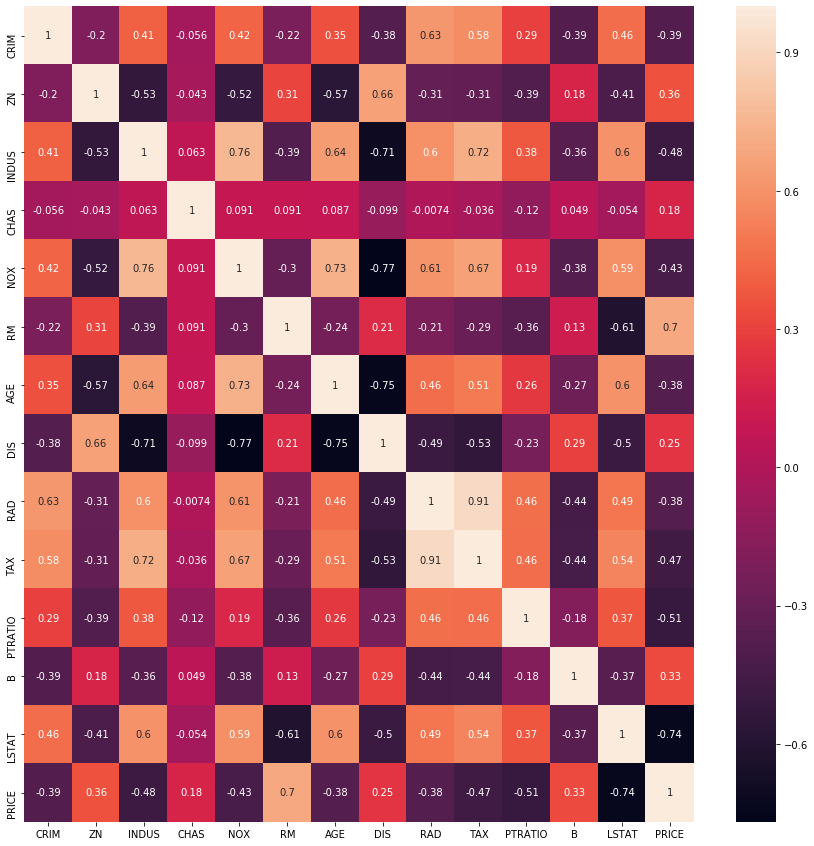

In [11]:
# plot heatop for columns correlations
corr = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.show()

In [12]:
# split data into X and y - features and target
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [13]:
# split data into train, test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [14]:
# Standradize the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [23]:
type(X_test)

numpy.ndarray

In [15]:
# instantiate classifier
classifier = GradientBoostingRegressor(learning_rate=0.5, loss='huber')
# train the model
classifier.fit(X_train, y_train)

# # model parameters
# param = {"loss":['ls', 'lad', 'huber', 'quantile'],
#         "learning_rate": [0.5, 0.8, 1, 1.5],
#         "n_estimators": [100, 150, 200],
#         }
# gs_cv = GridSearchCV(classifier, param_grid=param, cv=10)
# gs_cv.fit(X_train, y_train)


cfs = cross_val_score(classifier, X_train, y_train, cv=5).mean()

y_hat = classifier.predict(X_test)

print("Mean Square Error on test data is: ", mean_squared_error(y_test, y_hat))
print("Accuracy is: ", classifier.score(X_test, y_test))
print("Mean Cross Vlas Score is: ",  cfs)

Mean Square Error on test data is:  8.44505924892834
Accuracy is:  0.8866634222539242
Mean Cross Vlas Score is:  0.848383733943918


In [16]:
userInput_df = pd.DataFrame(columns=X.columns)

In [17]:
# instantiate an empty list
l = []
# loop through the length of our empty dataframe
for i in list(userInput_df.columns):
    # append a value of 0 to the list
    l.append(0)

# plug the first row with 0s 'the list'
userInput_df.loc[1,:] = l

In [18]:
# - CRIM     per capita crime rate by town
# - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
# - INDUS    proportion of non-retail business acres per town
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - NOX      nitric oxides concentration (parts per 10 million)
# - RM       average number of rooms per dwelling
# - AGE      proportion of owner-occupied units built prior to 1940
# - DIS      weighted distances to five Boston employment centres
# - RAD      index of accessibility to radial highways
# - TAX      full-value property-tax rate per $10,000
# - PTRATIO  pupil-teacher ratio by town
# - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT    % lower status of the population
# - MEDV     Median value of owner-occupied homes in $1000's

userInput_df['CRIM'] = 0
userInput_df['ZN'] = 100
userInput_df['INDUS'] = 5
userInput_df['CHAS'] = 1
userInput_df['NOX'] = 0
userInput_df['RM'] = 4
userInput_df['AGE'] = 40
userInput_df['DIS'] = 30
userInput_df['RAD'] = 2
userInput_df['TAX'] = 200
userInput_df['PTRATIO'] = 10
userInput_df['B'] = 0
userInput_df['LSTAT'] = 30

In [19]:
# create dataframe with prediction
prediction_df = pd.DataFrame(columns=['price'], data=classifier.predict(X_test), index=y_test.index)
prediction_df.head()

,price
173,24.013874
274,29.467358
491,14.459882
72,22.441328
452,17.821368


In [26]:
np.array(userInput_df)

array([[  0, 100,   5,   1,   0,   4,  40,  30,   2, 200,  10,   0,  30]])

In [44]:
scaled_inputs = scaler.transform(np.array(userInput_df))

In [30]:
str(classifier.predict(np.array(userInput_df)))

'[15.73202281]'

In [45]:
str(classifier.predict(scaled_inputs)).strip("[]")

'23.95447385'

In [21]:
# actuall y_test
y_test.head()

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: PRICE, dtype: float64